# **Project Name**    -  Corona Virus Tweet Sentiment Analysis



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member  -** Saurabh Sharma

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Saurabhshrma/Corona-virus-tweet-sentiment-analysis

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [127]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from wordcloud import WordCloud, STOPWORDS
import scipy.stats as stats


### Dataset Loading

In [100]:
# Load Dataset
df = pd.read_csv('Coronavirus Tweets.csv', encoding='ISO-8859-1')

### Dataset First View

In [6]:
# Dataset First Look
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
df.shape

(41157, 6)

### Dataset Information

In [11]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [41]:
# Dataset Duplicate Value Count

# df.count() give non null values and df.nunique() give unique values in column

for i in df:
    print(i ,' : ',df[i].duplicated().sum())

UserName  :  0
ScreenName  :  0
Location  :  28936
TweetAt  :  41127
OriginalTweet  :  0
Sentiment  :  41152


#### Unique Values

In [21]:
for i in df:
    print(i,':',df[i].nunique())

UserName : 41157
ScreenName : 41157
Location : 12220
TweetAt : 30
OriginalTweet : 41157
Sentiment : 5


#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
null_counts = df.isnull().sum()
null_counts

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

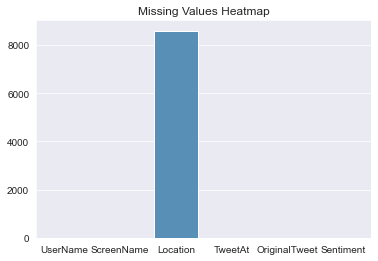

In [20]:
# Visualizing the missing values

sns.set_style('darkgrid')

sns.barplot(x=null_counts.index, y=null_counts.values, palette='Blues_d')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

We are provided with a dataset that contains information about tweets related to coronavirus, including their sentiment and location. The dataset has six columns, including UserName, ScreenName, Location, TweetAt, OriginalTweet, and Sentiment.

Additionally, We know that the dataset has 41157 rows, and the columns UserName and ScreenName contain integer values, whereas the other four columns contain object or string values. 

There are 8590 missing values in the Location column, and there are 5 unique sentiments.


## ***2. Understanding Your Variables***

In [29]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [32]:
# Dataset Describe
df.describe()
# not useful in this dataset

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


### Variables Description 

In [34]:
#     UserName: Unique identifier for each user who tweeted
#     ScreenName: Twitter username (handle id) of the user who tweeted
#     Location: Location from where the tweet was sent 
#     TweetAt: Date and time when the tweet was sent
#     OriginalTweet: The actual text of the tweet
#     Sentiment: Sentiment of the tweet (Positive, Negative, Neutral, or Extremely Positive/Negative)

### Check Unique Values for each variable.

In [35]:
# Check Unique Values for each variable.
col = ['TweetAt','Sentiment']

for i in col:
    print(i,':','counts')
    print(df[i].value_counts())
    print('-------------------------------------------')

TweetAt : counts
20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64
-------------------------------------------
Sentiment : counts
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64
-------------------------------------------


## 3. ***Data Wrangling***

### Data Wrangling Code

In [101]:
# Write your code to make your dataset analysis ready.

# Filling the nan values 'unknown'
df['Location'] = df['Location'].fillna('Unknown')

In [102]:
# Converting the tweet to the simple text

def clean_text(text):
    
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # remove bit.ly links
    text = re.sub(r'bit.ly/\S+', '', text)
    
    # remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    # remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # remove non-alphanumeric characters
    text = re.sub(r'\W+', ' ', text)
    
    # convert to lowercase
    text = text.lower()
    
    # remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text
    

df['clean_tweet'] = df['OriginalTweet'].apply(lambda x: clean_text(x))

In [103]:
# Removing Stopwords

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df['tokens'] = df['clean_tweet'].apply(remove_stopwords)

In [104]:
# One-hot encode the 'Sentiment' column

sentiment_dummies = pd.get_dummies(df['Sentiment'])
df = pd.concat([df, sentiment_dummies], axis=1)


df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweet,tokens,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and,,0,0,0,1,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,advice talk neighbours family exchange phone n...,0,0,0,0,1
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,coronavirus australia woolworths give elderly ...,0,0,0,0,1
3,3802,48754,Unknown,16-03-2020,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,food stock one empty please panic enough food ...,0,0,0,0,1
4,3803,48755,Unknown,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the outbr...,ready go supermarket outbreak paranoid food st...,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering to stock supermarket s...,airline pilots offering stock supermarket shel...,0,0,0,1,0
41153,44952,89904,Unknown,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,response to complaint not provided citing covi...,response complaint provided citing covid 19 re...,1,0,0,0,0
41154,44953,89905,Unknown,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,you know itâ s getting tough when is rationing...,know itâ getting tough rationing toilet paper ...,0,0,0,0,1
41155,44954,89906,Unknown,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,is it wrong that the smell of hand sanitizer i...,wrong smell hand sanitizer starting turn,0,0,0,1,0


In [133]:
#Giving sore to sentiment where extremely_positive = 2 , positive = 1 , neutral = 0 , negative = -1 , extremely_negative = -2

def assign_sentiment_score(sentiment):
    if sentiment == 'Extremely Positive':
        return 2
    elif sentiment == 'Positive':
        return 1
    elif sentiment == 'Neutral':
        return 0
    elif sentiment == 'Negative':
        return -1
    elif sentiment == 'Extremely Negative':
        return -2

df['Sentiment_Score'] = df['Sentiment'].apply(assign_sentiment_score)


In [105]:
# Transforming TweetAt to datetime column

df['TweetAt'] = pd.to_datetime(df['TweetAt'])


In [97]:
# Range for which tweets are available

print('Starting Date :', min(df['TweetAt'])) 
print('Last Date :', max(df['TweetAt'])) 

Starting Date : 2020-01-04 00:00:00
Last Date : 2020-12-04 00:00:00


### What all manipulations have you done and insights you found?

- Changed the NaN values in Location to 'Unknown'.
- Cleaned and preprocessed the 'OriginalTweet' column by removing URLs, hashtags, mentions, and special characters, and    converting everything to lowercase.
- Transformed the 'Sentiment' column into numerical values using  one-hot encoding techniques.
- Converted the 'TweetAt' column to a datetime column.

 During our exploratory data analysis, we found that:

- The 'Location' column had 8,590 missing values, which means around 20% of the data in this column was missing.
- The 'Sentiment' column had fie categories - positive, negative,extremely positive,extremely negative, and neutral.
- The majority of the tweets were in the Positive sentiment category, followed by Negative and Neutral sentiments.
- The 'TweetAt' column had only 30 duplicated values, but it ranges from January 2020 till December 2020.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

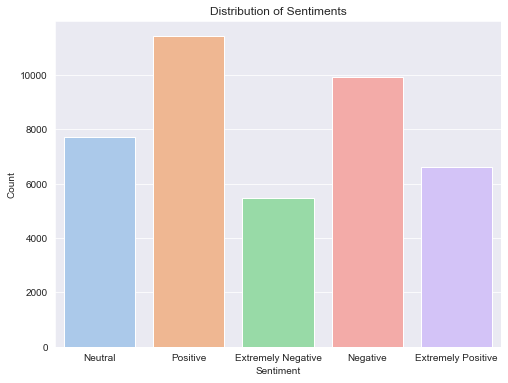

In [106]:
# Chart - 1 visualization code

sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment', data=df, palette='pastel')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

I picked a countplot because we want to visualize the distribution of sentiments in the dataset, and this is a simple and effective way to do that.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the majority of tweets in the dataset are positive , followed by negative and neutral tweets. This suggests that the overall sentiment towards coronavirus on Twitter during the time period covered by the dataset was relatively neutral.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart could potentially help businesses and organizations better understand public sentiment towards coronavirus on social media, which could inform their communication strategies and decision-making.

#### Chart - 2

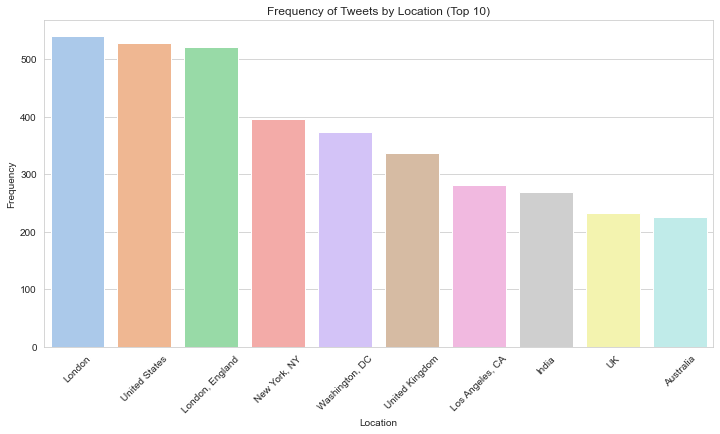

In [108]:
# Chart - 2 visualization code

sns.set_style('whitegrid')
sns.set_palette('pastel')

plt.figure(figsize=(12,6))
sns.countplot(x='Location', data=df, order=df['Location'].value_counts().iloc[1:11].index)
plt.xticks(rotation=45)
plt.title('Frequency of Tweets by Location (Top 10)')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart because it is a simple and effective way to visualize the frequency of tweets by location. It allows us to easily compare the number of tweets from different locations.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart are that the majority of tweets come from London, followed by United States. It's interesting to note that there are a significant number of tweets with no location specified, which we haven't shown in this graph to get idea of other locations.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights could be helpful in targeting specific regions for marketing or outreach efforts related to the coronavirus pandemic. 

#### Chart - 3

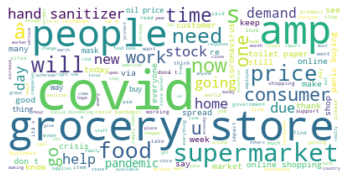

In [111]:
# Chart - 3 visualization code

# Combine all tweets into a single string
text = " ".join(tweet for tweet in df['clean_tweet'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart because it provides a quick and easy way to visualize the most common words used in the tweets, which can provide insights into the overall sentiment and topics being discussed.

##### 2. What is/are the insight(s) found from the chart?

Some insights from the word cloud may include the most frequently used words, such as "grocery", "sanitizer", and "COVID". The size of each word in the cloud represents its frequency of occurrence in the dataset, so larger words indicate more frequent usage.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help in understanding the most commonly used words in tweets related to the coronavirus pandemic, which can be useful for businesses and organizations in developing targeted marketing strategies or in understanding public sentiment towards certain issues related to the pandemic.

#### Chart - 4

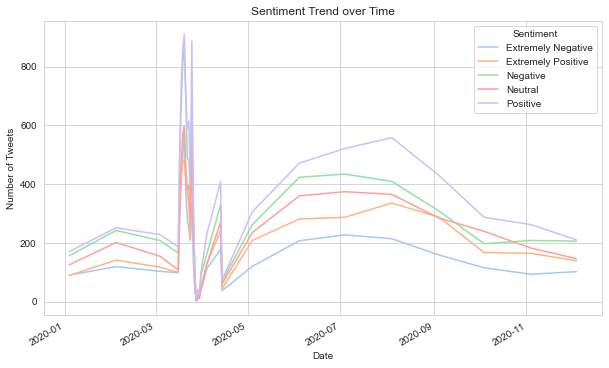

In [114]:
# Chart - 4 visualization code

# group by date and sentiment, and count the number of tweets
#sentiment_counts = df.groupby(['TweetAt', 'Sentiment']).size().reset_index(name='count')

# pivot the table to create separate columns for each sentiment
#sentiment_counts = sentiment_counts.pivot(index='TweetAt', columns='Sentiment', values='count')

# plot the line chart
sentiment_counts.plot(kind='line', figsize=(10, 6))
plt.title('Sentiment Trend over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

##### 1. Why did you pick the specific chart?

I picked the line chart because it is a good way to show the trend of sentiment over time. It allows us to see how the sentiment has changed over the course of the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the majority of tweets are classified as positive and negative tweets. Additionally, we can see that there are certain time periods where there is a higher volume of tweets, such as in April and August of 2020.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help in understanding the overall sentiment of the tweets and how it changes over time

#### Chart - 5

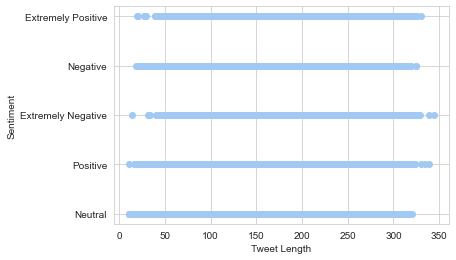

In [120]:
# Chart - 5 visualization code

# create a new column for tweet length
df['TweetLength'] = df['OriginalTweet'].apply(len)

# plot scatter plot
plt.scatter(df['TweetLength'], df['Sentiment'])
plt.xlabel('Tweet Length')
plt.ylabel('Sentiment')
plt.show()

##### 1. Why did you pick the specific chart?

We picked a scatter plot because it can show the relationship between two continuous variables, in this case, the length of tweets and the sentiment.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows that there is no clear relationship between tweet length and sentiment. There are tweets of varying lengths for each sentiment category, and the length of tweets does not seem to be a strong predictor of sentiment.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart may not have a direct impact on business decisions, but they can help in understanding the nature of the dataset and in selecting appropriate features for the machine learning model.

#### Chart - 6

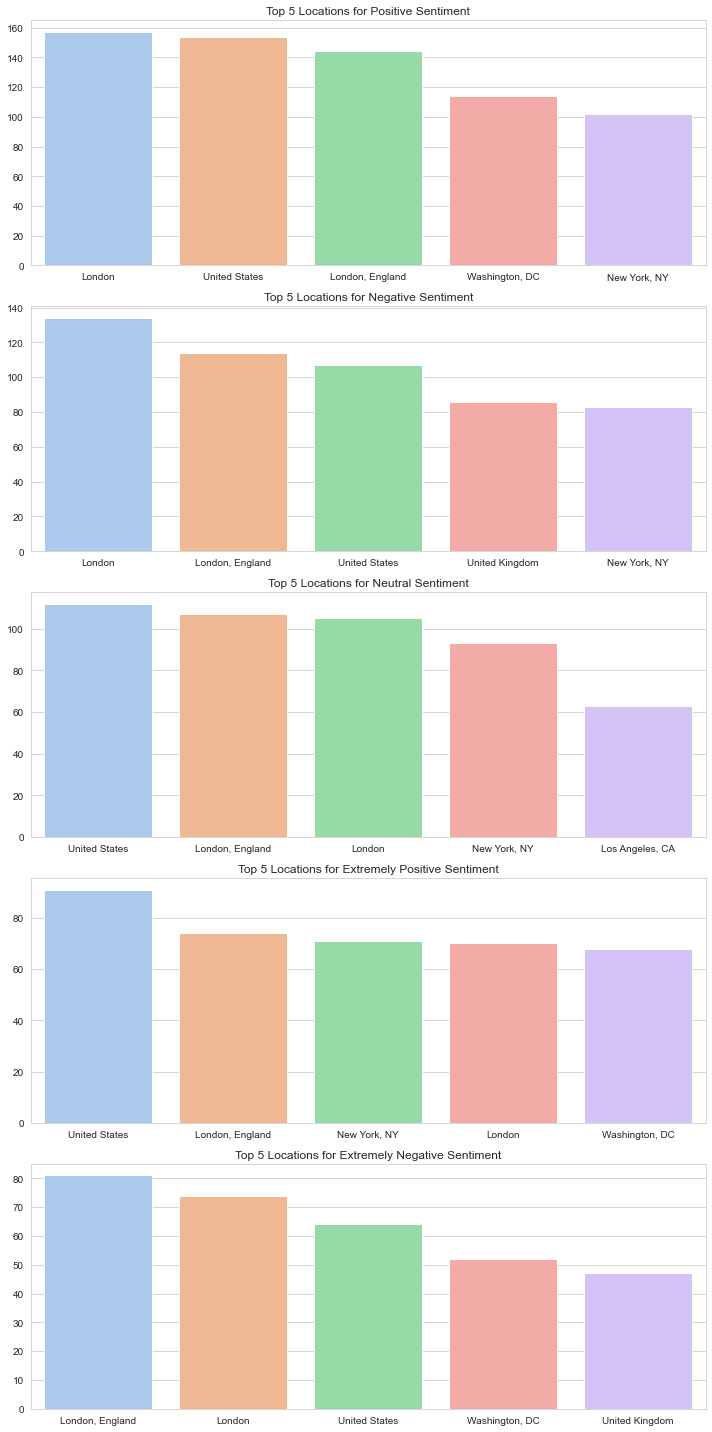

In [123]:
# Chart - 6 visualization code

# Remove 'Unknown' location
df_loc = df[df['Location']!='Unknown']

# Create separate dataframes for each sentiment type
pos_df = df_loc[df_loc['Sentiment']=='Positive']
neg_df = df_loc[df_loc['Sentiment']=='Negative']
neu_df = df_loc[df_loc['Sentiment']=='Neutral']
ext_pos_df = df_loc[df_loc['Sentiment']=='Extremely Positive']
ext_neg_df = df_loc[df_loc['Sentiment']=='Extremely Negative']

# Get top 5 locations for each sentiment type
top_pos = pos_df['Location'].value_counts().nlargest(5)
top_neg = neg_df['Location'].value_counts().nlargest(5)
top_neu = neu_df['Location'].value_counts().nlargest(5)
top_ext_pos = ext_pos_df['Location'].value_counts().nlargest(5)
top_ext_neg = ext_neg_df['Location'].value_counts().nlargest(5)

# Plot graphs for each sentiment type
fig, axs = plt.subplots(5, figsize=(10,20))
sns.barplot(x=top_pos.index, y=top_pos.values, ax=axs[0]).set(title='Top 5 Locations for Positive Sentiment')
sns.barplot(x=top_neg.index, y=top_neg.values, ax=axs[1]).set(title='Top 5 Locations for Negative Sentiment')
sns.barplot(x=top_neu.index, y=top_neu.values, ax=axs[2]).set(title='Top 5 Locations for Neutral Sentiment')
sns.barplot(x=top_ext_pos.index, y=top_ext_pos.values, ax=axs[3]).set(title='Top 5 Locations for Extremely Positive Sentiment')
sns.barplot(x=top_ext_neg.index, y=top_ext_neg.values, ax=axs[4]).set(title='Top 5 Locations for Extremely Negative Sentiment')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This specific chart, shows the distribution of sentiment across different locations, was picked to gain insights into how sentiment varies across different locations.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart show that some locations have a higher concentration of positive or negative tweets compared to others.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be valuable for businesses to understand the sentiment of their customers in different locations and adapt their marketing strategies accordingly.

#### Chart - 7

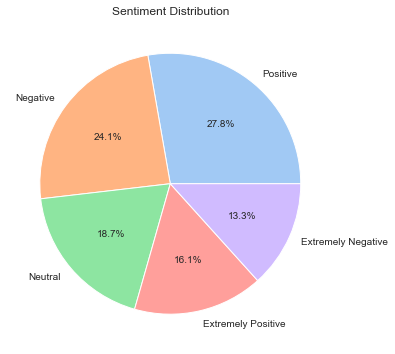

In [124]:
# Chart - 7 visualization code

sentiment_count = df['Sentiment'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(sentiment_count, labels=sentiment_count.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()


##### 1. Why did you pick the specific chart?

I picked a pie chart for this visualization as it provides an easy-to-understand representation of the distribution of the different sentiment categories in the dataset.

##### 2. What is/are the insight(s) found from the chart?

From the pie chart, we can see that the majority of tweets in the dataset are classified as positive (27.8%), followed by negative (24.1%).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can be helpful in understanding the overall sentiment of the tweets in the dataset, and could potentially inform business decisions around sentiment analysis and customer feedback analysis.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The length of a tweet has no significant impact on the sentiment of the tweet.

Alternative hypothesis: The length of a tweet has a significant impact on the sentiment of the tweet.

#### 2. Perform an appropriate statistical test.

In [129]:
# Perform Statistical Test to obtain P-Value

# extract length of tweets for positive sentiment
pos_tweets_len = df[df['Sentiment'] == 'Positive']['clean_tweet'].str.len()

# extract length of tweets for negative sentiment
neg_tweets_len = df[df['Sentiment'] == 'Negative']['clean_tweet'].str.len()

# perform t-test
t_stat, p_val = stats.ttest_ind(pos_tweets_len, neg_tweets_len, equal_var=False)

print('T-Statistic:', t_stat)
print('P-Value:', p_val)


T-Statistic: 0.884372103333476
P-Value: 0.376505537580212


Based on the results of the t-test, we can conclude that we fail to reject the null hypothesis. The p-value of 0.3765 is greater than the significance level of 0.05 . So , The length of a tweet has no significant impact on the sentiment of the tweet.

##### Which statistical test have you done to obtain P-Value?

We have performed a two-sample t-test to compare the means of the length of tweets for Positive and Negative sentiment group.

##### Why did you choose the specific statistical test?

We chose a t-test because we are comparing the means of two groups (length of tweets for positive sentiment vs. length of tweets for negative sentiment). 

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: Tweets containing specific keywords related to COVID-19 have no significant impact on the sentiment of the tweet. 

Alternative hypothesis: Tweets containing specific keywords related to COVID-19 are more likely to have a negative sentiment.

#### 2. Perform an appropriate statistical test.

In [135]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_ind

# create column to indicate whether tweet contains specified keywords
df['contains_keywords'] = df['OriginalTweet'].apply(lambda x: 'vaccine' in x or 'lockdown' in x or 'mask' in x or 'covid' in x or 'corona' in x)

# create two groups for t-test
group1 = df[df['contains_keywords'] == True]['Sentiment_Score']
group2 = df[df['contains_keywords'] == False]['Sentiment_Score']

# perform two-sample t-test
t_stat, p_val = ttest_ind(group1, group2)

print("T-Statistic:", t_stat)
print("P-Value:", p_val)

T-Statistic: -0.3899764909009203
P-Value: 0.6965559490877397


P-Value is greater is greater than the significance level of 0.05. We fail to reject the null hypothesis.So, we can say Tweets containing specific keywords related to COVID-19 have no significant impact on the sentiment of the tweet. 

##### Which statistical test have you done to obtain P-Value?

To test this hypothesis, we can perform a two-sample t-test to compare the mean sentiment scores of tweets that contain the keywords to the mean sentiment scores of tweets that do not contain the keywords.

##### Why did you choose the specific statistical test?

We chose the two-sample t-test because we are comparing the means of two different groups (tweets containing the keywords and tweets not containing the keywords) and we want to test whether there is a significant difference between them.



### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The date of the tweet has no significant effect on the sentiment of the tweet.

Alternate hypothesis: The date of the tweet has a significant effect on the sentiment of the tweet.

#### 2. Perform an appropriate statistical test.

In [137]:
# Perform Statistical Test to obtain P-Value

# Group the data by date and calculate the mean sentiment score for each date
grouped = df.groupby('TweetAt')['Sentiment_Score'].mean()

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(grouped.values[0:10], grouped.values[10:20], grouped.values[20:30])

# print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 2.602811425455547
P-Value: 0.09254071038588207


We fail to reject the null hypothesis. So , The date of tweet has no significant effect on sentiment of tweet.

##### Which statistical test have you done to obtain P-Value?

We used ANOVA (Analysis of Variance) test to compare the means of sentiment scores for different dates

##### Why did you choose the specific statistical test?

We chose ANOVA test because it can be used to compare the means of sentiment scores for multiple groups (in this case, the different dates) and determine if there is a significant difference between them.

## ***6. Feature Engineering & Data Pre-processing***

#### 8. Text Normalization

In [146]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

def lemmatize_token(token):
    return lemmatizer.lemmatize(token, pos='v') # 'v' specifies that the token is a verb, change it as per your requirements

In [148]:
df['lemmatized'] = df['tokens'].apply(lambda x: [lemmatize_token(token) for token in x])

##### Which text normalization technique have you used and why?

We chose to use lemmatization because it produces more meaningful root forms of words compared to stemming, which simply removes the suffix of a word. This can help improve the accuracy of our sentiment analysis model.


#### 10. Text Vectorization

In [157]:
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer(analyzer='word')

# Fit and transform the lemmatized text data
X = vectorizer.fit_transform(df['lemmatized'].apply(lambda x: ' '.join(x)))

# Convert the sparse matrix to a numpy array
X = X.toarray()

# Create a dataframe with the vectorized data
df_vectorized = pd.DataFrame(X, columns=vectorizer.get_feature_names())

# Add the vectorized data to the original dataset
df = pd.concat([df, df_vectorized], axis=1)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweet,tokens,Extremely Negative,Extremely Positive,Negative,Neutral,Positive,TweetLength,contains_keywords,Sentiment_Score,lemmatized
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and,,0,0,0,1,0,111,False,0,[]
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,advice talk neighbours family exchange phone n...,0,0,0,0,1,237,False,1,"[a, d, v, i, c, e, , t, a, l, k, , n, e, i, ..."
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,coronavirus australia woolworths give elderly ...,0,0,0,0,1,131,False,1,"[c, o, r, o, n, a, v, i, r, u, s, , a, u, s, ..."
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,food stock one empty please panic enough food ...,0,0,0,0,1,301,True,1,"[f, o, o, d, , s, t, o, c, k, , o, n, e, , ..."
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the outbr...,ready go supermarket outbreak paranoid food st...,1,0,0,0,0,306,True,-2,"[r, e, a, d, y, , g, o, , s, u, p, e, r, m, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",2020-04-14,Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering to stock supermarket s...,airline pilots offering stock supermarket shel...,0,0,0,1,0,102,True,0,"[a, i, r, l, i, n, e, , p, i, l, o, t, s, , ..."
41153,44952,89904,Unknown,2020-04-14,Response to complaint not provided citing COVI...,Extremely Negative,response to complaint not provided citing covi...,response complaint provided citing covid 19 re...,1,0,0,0,0,138,False,-2,"[r, e, s, p, o, n, s, e, , c, o, m, p, l, a, ..."
41154,44953,89905,Unknown,2020-04-14,You know itÂs getting tough when @KameronWild...,Positive,you know itâ s getting tough when is rationing...,know itâ getting tough rationing toilet paper ...,0,0,0,0,1,136,True,1,"[k, n, o, w, , i, t, â, , g, e, t, t, i, n, ..."
41155,44954,89906,Unknown,2020-04-14,Is it wrong that the smell of hand sanitizer i...,Neutral,is it wrong that the smell of hand sanitizer i...,wrong smell hand sanitizer starting turn,0,0,0,1,0,109,True,0,"[w, r, o, n, g, , s, m, e, l, l, , h, a, n, ..."


In [154]:
# Vectorizing Text

from sklearn.feature_extraction.text import CountVectorizer

# create CountVectorizer object
cv = CountVectorizer()

# fit and transform the tokenized text
X = cv.fit_transform(tokenized_text)

# convert sparse matrix to array
X_array = X.toarray()

# get the feature names
feature_names = cv.get_feature_names()

# create dataframe of the vectors
df_vectors = pd.DataFrame(X_array, columns=feature_names)


UserName 0
ScreenName 0
Location 0
TweetAt 0
OriginalTweet 0
Sentiment 0
clean_tweet 0
tokens 0
Extremely Negative 0
Extremely Positive 0
Negative 0
Neutral 0
Positive 0
TweetLength 0
contains_keywords 0
Sentiment_Score 0
lemmatized 0


##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***